# Experiments with the OpenAI Sentiment Neuron

I read the original paper [here](https://arxiv.org/abs/1704.01444) and was curious to explore the code.  Thankfully, the OpenAI team [published their code](https://github.com/openai/generating-reviews-discovering-sentiment).

This example library wraps the original code written by the OpenAI team into a simple utility library so it can be used on other projects.  I also added heat mapping on results, similar to how others have added some sort of visualization for the results. 

In [1]:
from sentiment_neuron.encoder import SentimentNeuron
neuron = SentimentNeuron(nbatch=32)

2019-10-27 17:07:09,282|sentiment_neuron.encoder|DEBUG| Rebuilding model...
2019-10-27 17:07:09,460|sentiment_neuron.encoder|DEBUG| Building TensorFlow graph...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead
2019-10-27 17:07:12,496|sentiment_neuron.encoder|DEBUG| Adding methods...


The sentiment neuron API is meant to mimic other model APIs like Keras, so I've renamed the method from `transform` to `predict`.  It is, admittedly, slow to predict on large batches of text due to how I configured the loop.  The original model sticks all text together with a marker character inbetween segments.  As I was adapting the code, I found it difficult to understand the logic of the original developers for how to split the data afterwards, so the `.predict` method passes each text observation individually.

The neuron expects a list of text examples (or series) and will return a `SentimentResult` object for each observation supplied.  These objects store the model results for the piece of text and have a `.plot()` convience method for plotting the heat map for that observation. 

In [2]:
results = neuron.predict(['This is garbage.  Save your money.',
                          'I am so happy with this product.  My life will never be the same.'])

2019-10-27 17:07:12,507|sentiment_neuron.encoder|DEBUG| Predicting sentiment on 2 example(s)


100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


2019-10-27 17:07:13,321|sentiment_neuron.encoder|DEBUG| Completed sentiment prediction in 0.8128437995910645 seconds


## Positive example

<Figure size 432x288 with 0 Axes>

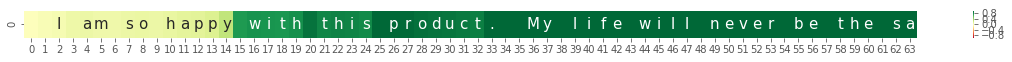

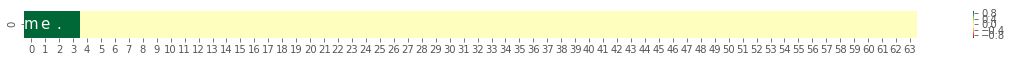

In [3]:
results[1].plot()

In [4]:
print(f'Overall neuron value: {results[1].sentiment} \n\n Individual character values: \n {results[1].char_sentiment}')

Overall neuron value: 2.0421886444091797 

 Individual character values: 
 [0.01258736 0.0354458  0.04874654 0.08836341 0.09750153 0.08503995
 0.08408626 0.10030627 0.10176072 0.09827792 0.1132753  0.13390246
 0.1433589  0.17231469 0.29185826 0.7832248  0.8131222  0.80578613
 0.8004872  0.8286732  0.9466955  0.87475204 0.88718075 0.88181514
 0.85346186 0.99788475 0.99640346 0.98856634 0.9681767  0.95005304
 0.9386763  0.92593396 0.9006361  1.2380987  1.5773304  1.6131158
 1.6244265  1.6470503  1.6923599  1.706782   1.707195   1.7089661
 1.7076373  1.7095382  1.7103173  1.7113867  1.7150792  1.7616451
 1.7626878  1.7727998  1.7846197  1.785463   1.806463   1.7948732
 1.7912302  1.792841   1.8017694  1.8015684  1.8024241  1.8089536
 1.8075434  1.8080091  1.8082461  1.808976   1.7954268  1.7949163
 1.7948662  2.0421886 ]


## Negative example

<Figure size 432x288 with 0 Axes>

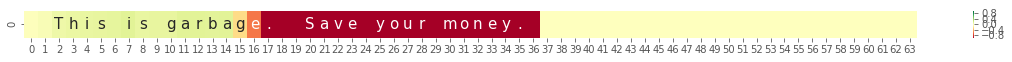

In [5]:
results[0].plot()

In [6]:
print(f'Overall neuron value: {results[0].sentiment} \n\n Individual character values: \n {results[0].char_sentiment}')

Overall neuron value: -2.8720157146453857 

 Individual character values: 
 [ 0.01258736  0.0354458   0.08830567  0.1051736   0.11557285  0.1190064
  0.1278361   0.14965172  0.11554806  0.11928537  0.12386942  0.14975217
  0.15386267  0.14300498  0.15515609 -0.21306401 -0.56935495 -1.1472075
 -1.654886   -1.7842262  -1.8858931  -1.871348   -1.8785228  -1.7842824
 -1.8546131  -1.9177712  -2.1757393  -2.421734   -2.3976924  -2.4219606
 -2.427227   -2.4586995  -2.4583673  -2.6686225  -2.9398146  -2.7080832
 -2.8720157 ]


## Sarcastic examples
I've found the model still isn't perfect, especially for examples of sarcastic text. 

In [7]:
results = neuron.predict(['This is such a good model.  I love that it broke within two minutes of me opening it.',
                          'This is the worst.  It is telling me my true feelings?'])

2019-10-27 17:07:15,559|sentiment_neuron.encoder|DEBUG| Predicting sentiment on 2 example(s)


100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


2019-10-27 17:07:16,010|sentiment_neuron.encoder|DEBUG| Completed sentiment prediction in 0.45056676864624023 seconds


<Figure size 432x288 with 0 Axes>

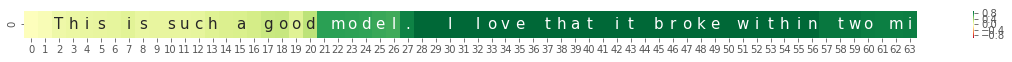

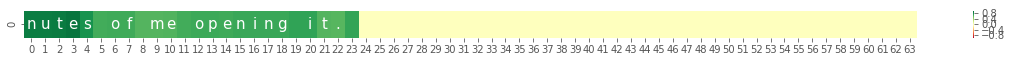

In [8]:
results[0].plot()

In [9]:
print(f'Overall neuron value: {results[0].sentiment} \n\n Individual character values: \n {results[0].char_sentiment}')

Overall neuron value: 0.7274081707000732 

 Individual character values: 
 [0.01258736 0.0354458  0.08830567 0.1051736  0.11557285 0.1190064
 0.1278361  0.14965172 0.11554806 0.11928537 0.11751562 0.11980066
 0.12787603 0.16692626 0.1822813  0.19067189 0.21786632 0.26180187
 0.27071527 0.16211061 0.30792147 0.7553624  0.7558395  0.7473407
 0.7360904  0.71623963 0.70215166 0.884575   1.1239643  1.1376792
 1.1058184  1.1449184  1.1457446  1.1458869  1.1498609  1.1592308
 1.2065208  1.209818   1.2130275  1.2246462  1.2227033  1.3578943
 1.3559309  1.2738948  1.2844815  1.2806481  1.2787719  1.2777032
 1.228378   1.2003914  1.1528686  1.152931   1.1476825  1.1590167
 1.1607518  1.1613587  1.1486124  0.9352138  0.9350249  0.9318943
 0.91127133 0.90325254 0.90559024 0.9135133  0.9093874  0.9125354
 0.91860086 0.9391873  0.81955993 0.69215965 0.69536334 0.696527
 0.6415584  0.64476097 0.651858   0.6947955  0.708757   0.70590603
 0.70017457 0.7123138  0.71150666 0.71363586 0.7153855  0.7380662

<Figure size 432x288 with 0 Axes>

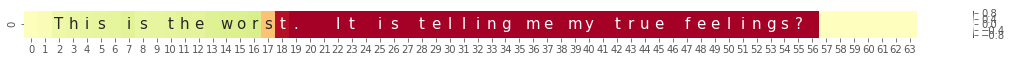

In [10]:
results[1].plot()

In [11]:
print(f'Overall neuron value: {results[1].sentiment} \n\n Individual character values: \n {results[1].char_sentiment}')

Overall neuron value: -1.4744641780853271 

 Individual character values: 
 [ 0.01258736  0.0354458   0.08830567  0.1051736   0.11557285  0.1190064
  0.1278361   0.14965172  0.11554806  0.11928537  0.13117734  0.14210263
  0.13755594  0.17121977  0.1829709   0.18696192  0.19692099 -0.31560186
 -0.9352011  -1.3812965  -1.7498794  -1.853391   -1.9593228  -1.7974628
 -1.8957353  -1.8392756  -1.8064399  -1.7700348  -1.7643727  -1.7446029
 -1.733135   -1.7182767  -1.7801859  -1.7354224  -1.5843877  -1.7135359
 -1.6786305  -1.6644944  -1.7898281  -1.739097   -1.7109052  -1.7270372
 -1.7217131  -1.7211525  -1.699043   -1.7022213  -1.6623763  -1.6612492
 -1.663837   -1.6710665  -1.6683447  -1.6678544  -1.6706375  -1.6590834
 -1.5022445  -1.4140158  -1.4744642 ]


The model still is pretty cool!  Combined with other methods, it help guage sentiment, especially in a context where no training data exist. 

## Implementing

I've used the model to leverage transfer learning and apply to specific texts I was responsibly for analyzing.  It is best combined with sentiment labels for your context and then training a logistic classifier on the output neuron values to translate it closer to the text at hand.  